In [1]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df = pd.read_csv('kaggle_survey_2020_responses.csv')

/Users/akshay/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [106]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
extract = ['_'.join([j[1] for j in enumerate(i[1].split('_')) 
                  if j[0]<2 and j[1] not in ('OTHER', 'Part')]) 
          for i in enumerate(df.columns)]

In [463]:
def get_cols(question_number):
    idx = [i[0] for i in enumerate(extract) if i[1]==question_number]
    
    q = df.iloc[0,idx[0]].split('?')[0]+'?'
    s = pd.DataFrame(df.iloc[1:,idx])
    
    if len(s.columns)>1:
        options = list(s.apply(lambda x: [i for i in list(pd.unique(x)) if str(i) != 'nan'][0], axis=0))
        s.columns = options
        return 'MULTIPLE - '+q,s.notna().astype(int)
    else:
        s = pd.get_dummies(s, prefix='')
        return 'SINGLE - '+q,s
    
def get_chart(question_number, sort=True):
    q,d = get_cols(question_number)
    dd = pd.DataFrame(d.sum(axis=0)).reset_index()
    dd.columns = ['opt','sum']
    dd['cent'] = np.round(dd['sum']/np.sum(dd['sum'])*100, 2)
    if sort==True:
        dd = dd.sort_values('cent', ascending=False)
    dd.plot.bar(x='opt', y='cent', figsize=(12,5), title=q)

In [464]:
question_list = [k for k,v in itertools.groupby(extract[1:])]

/Users/akshay/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


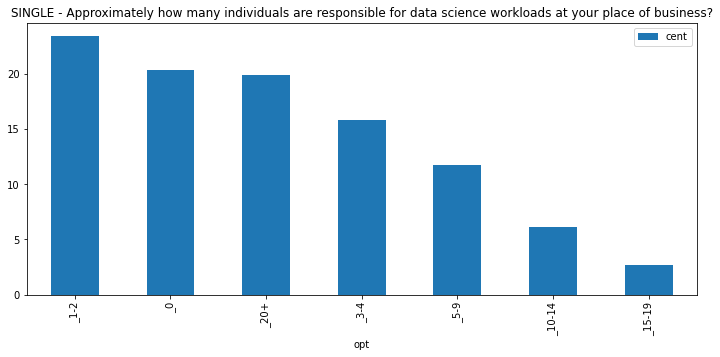

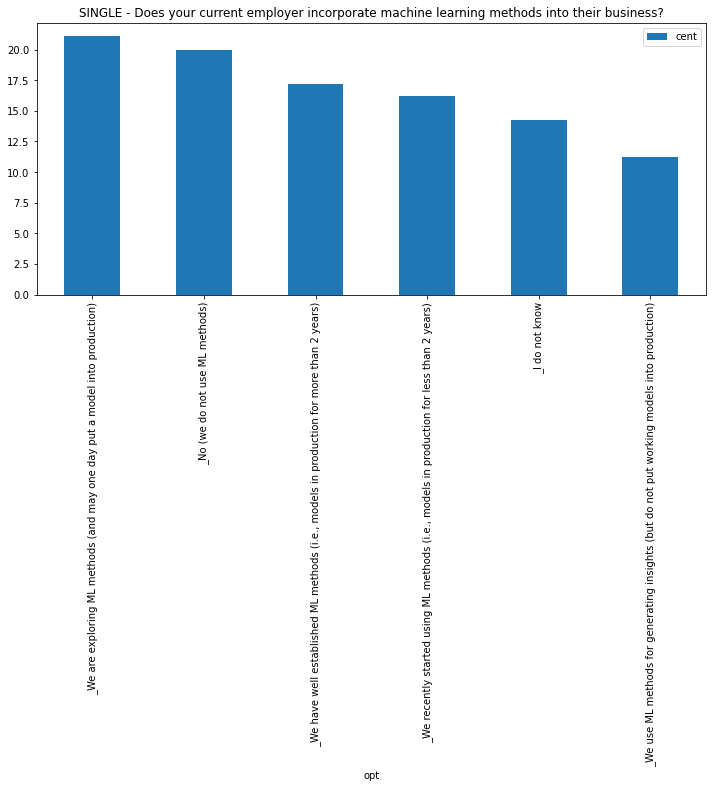

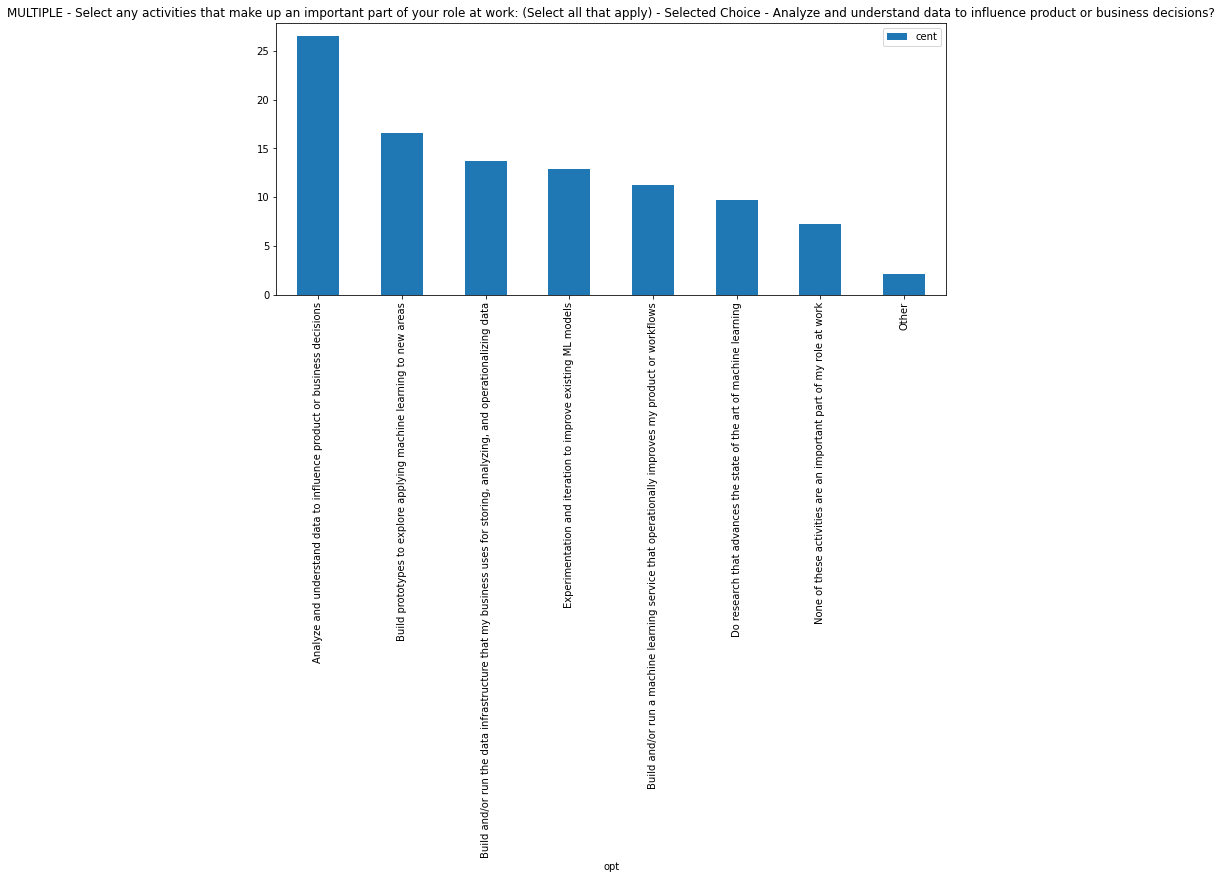

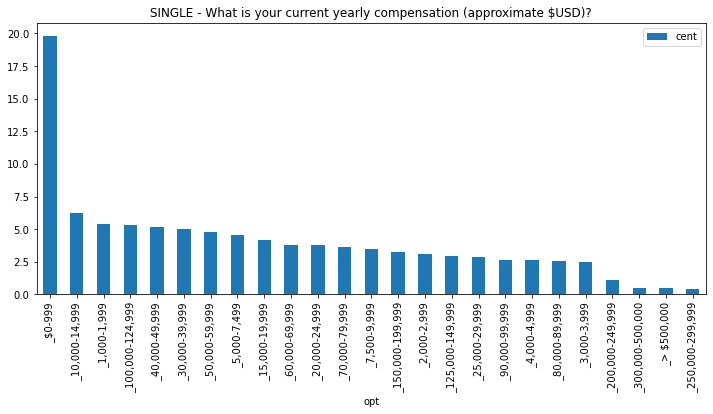

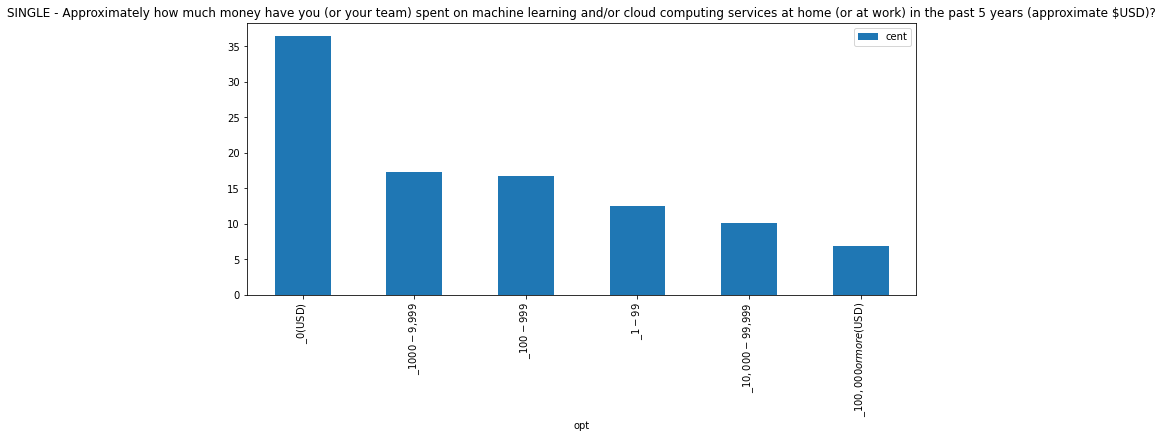

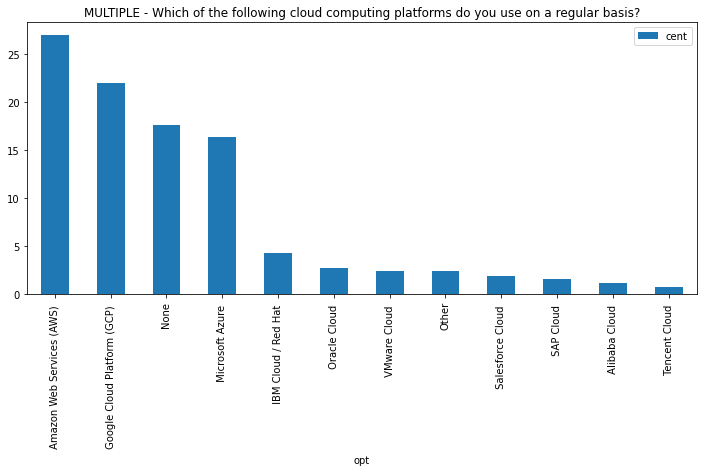

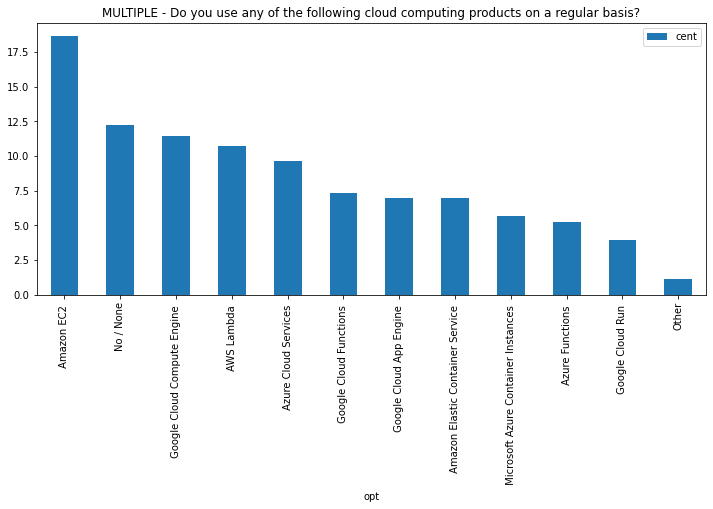

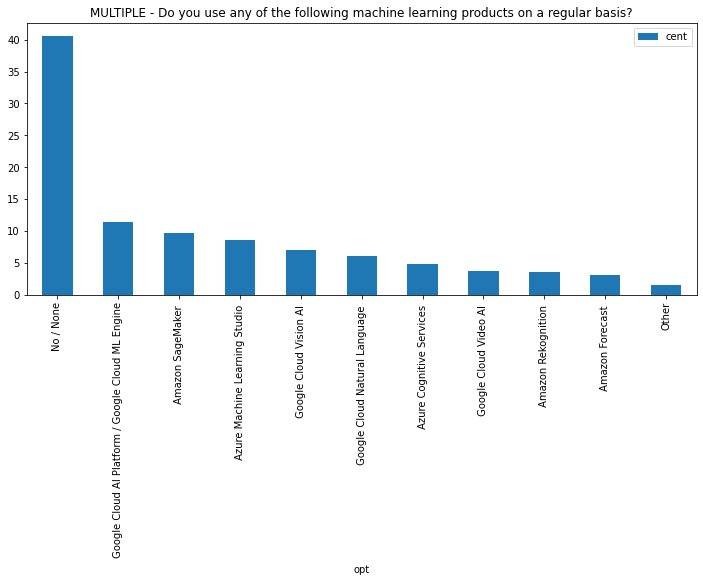

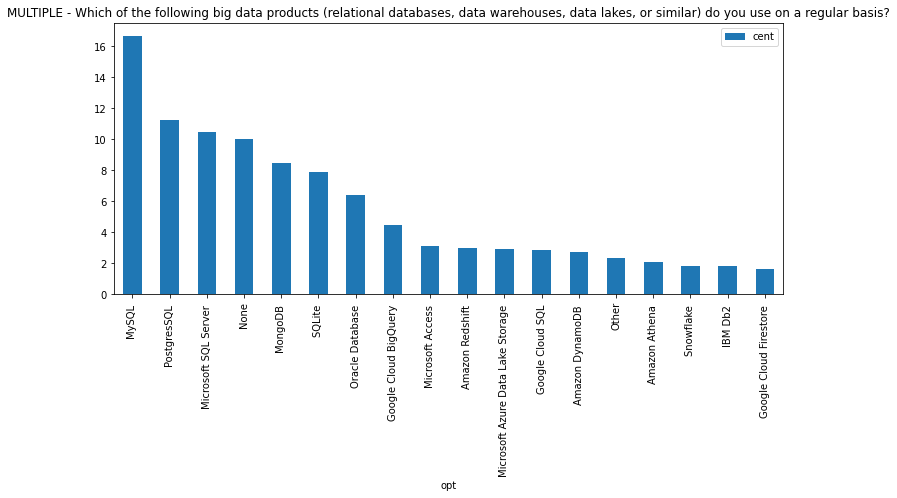

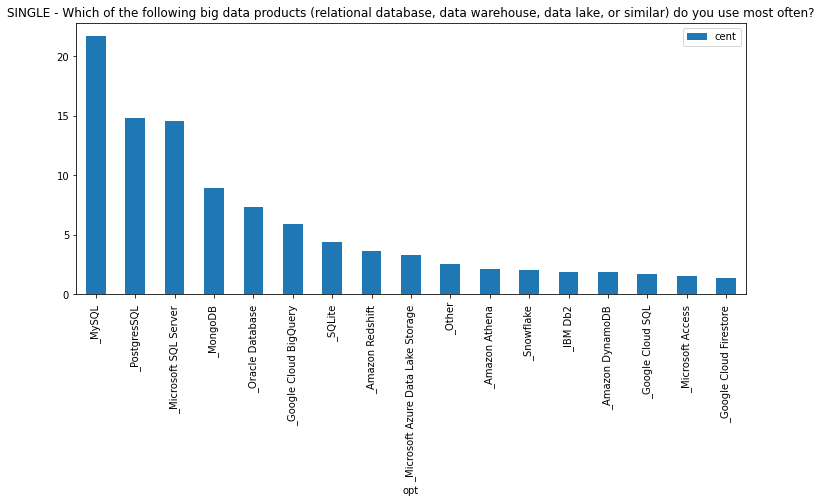

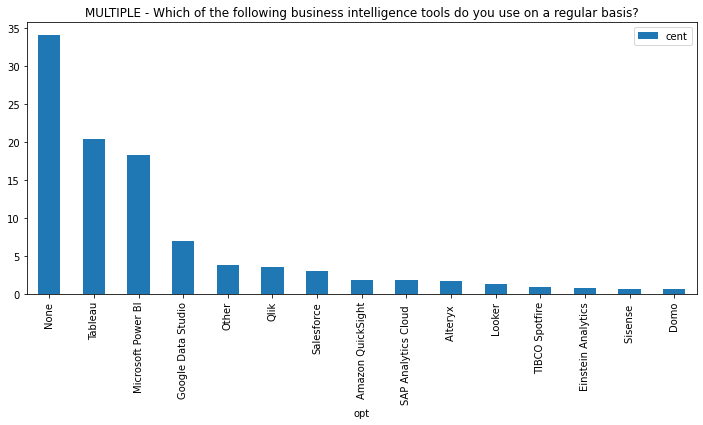

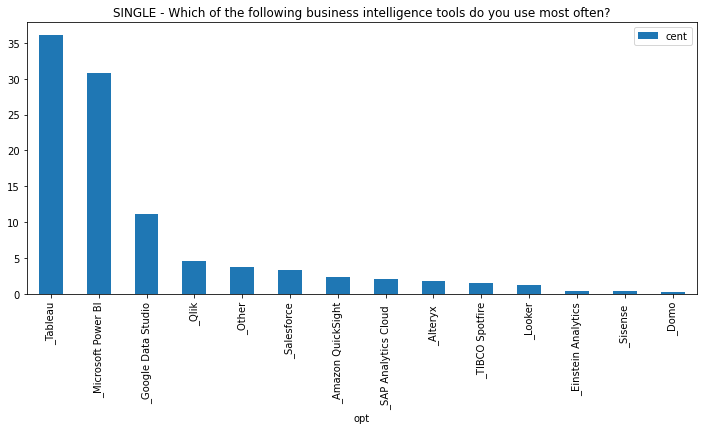

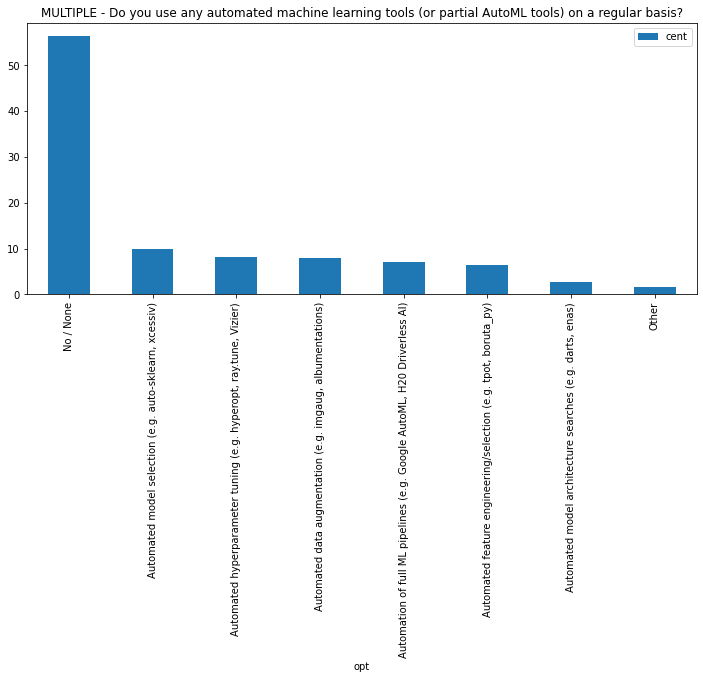

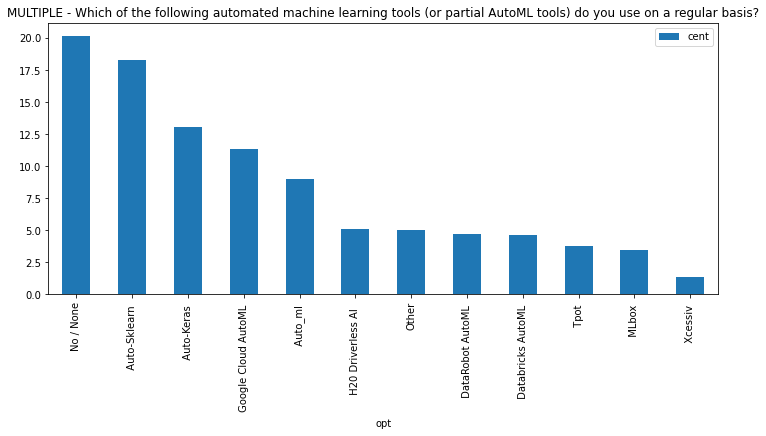

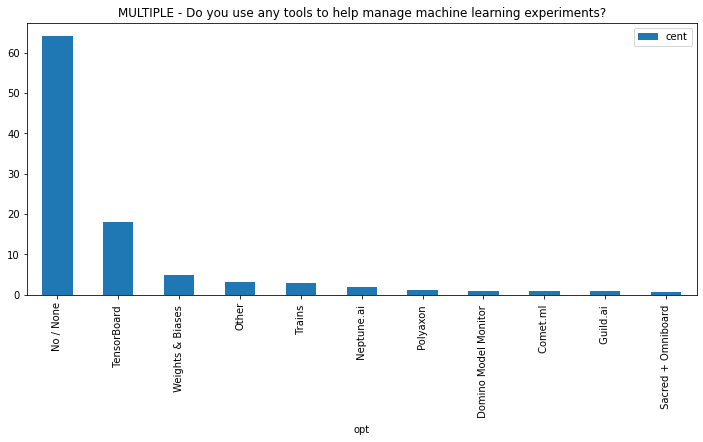

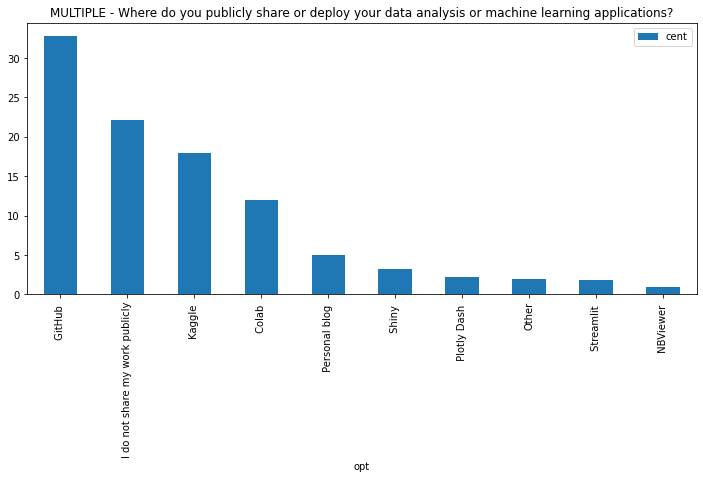

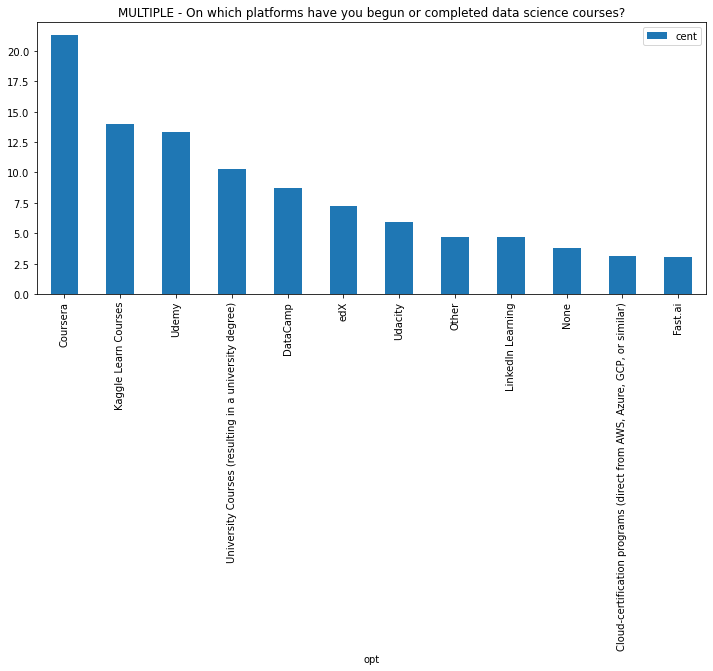

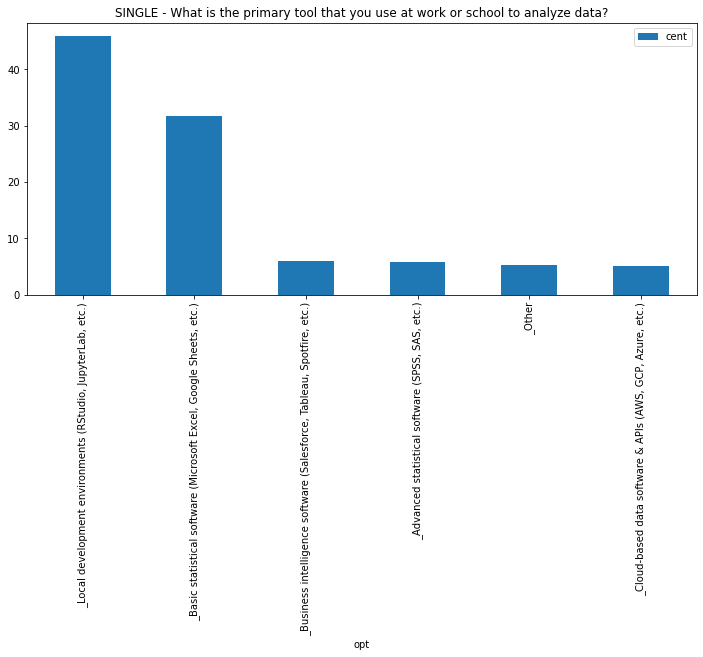

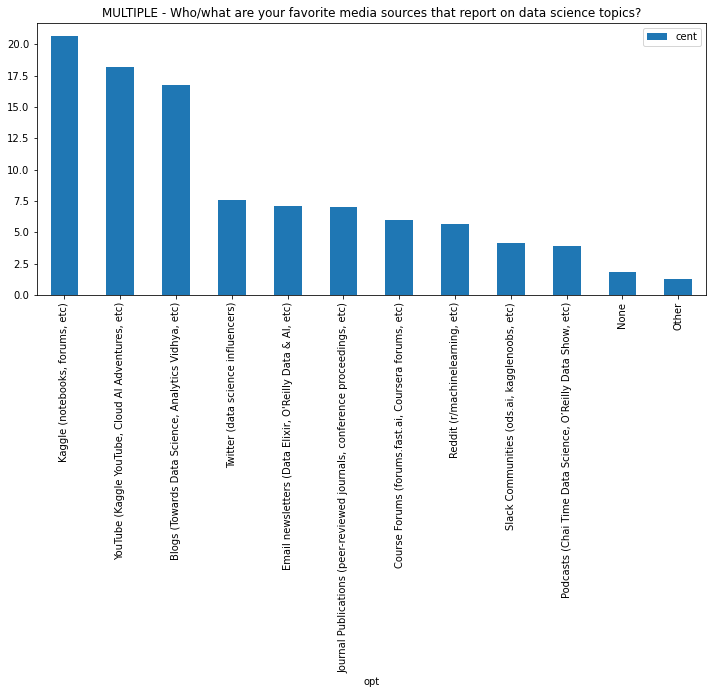

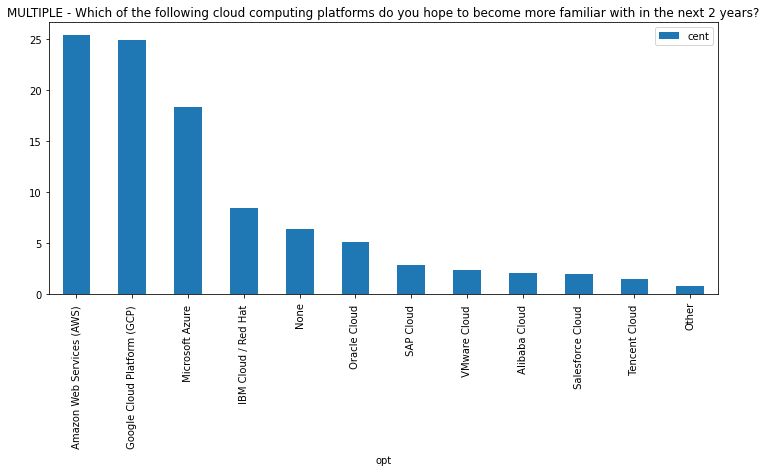

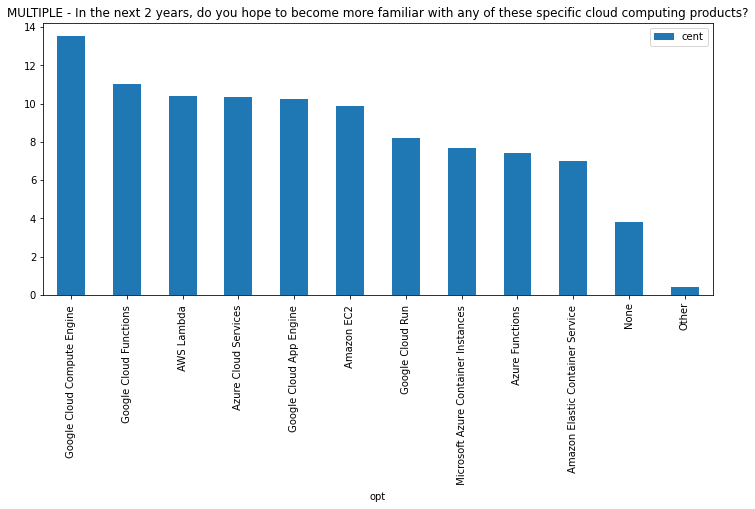

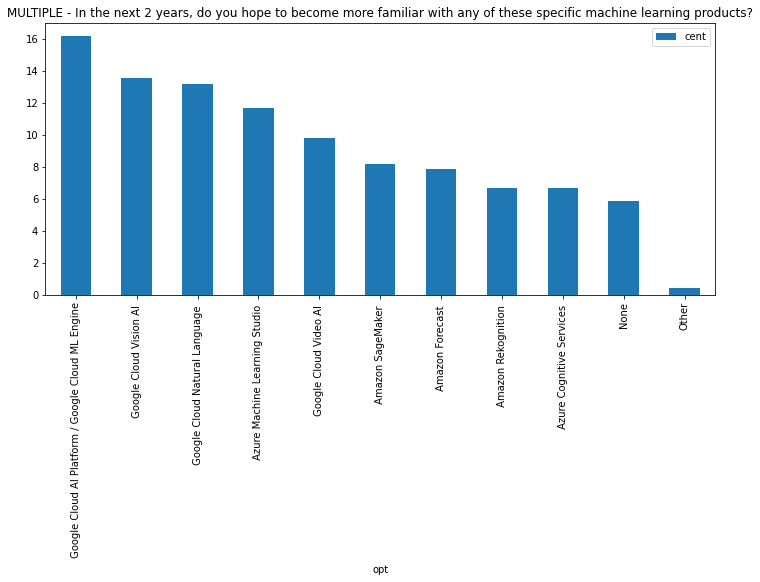

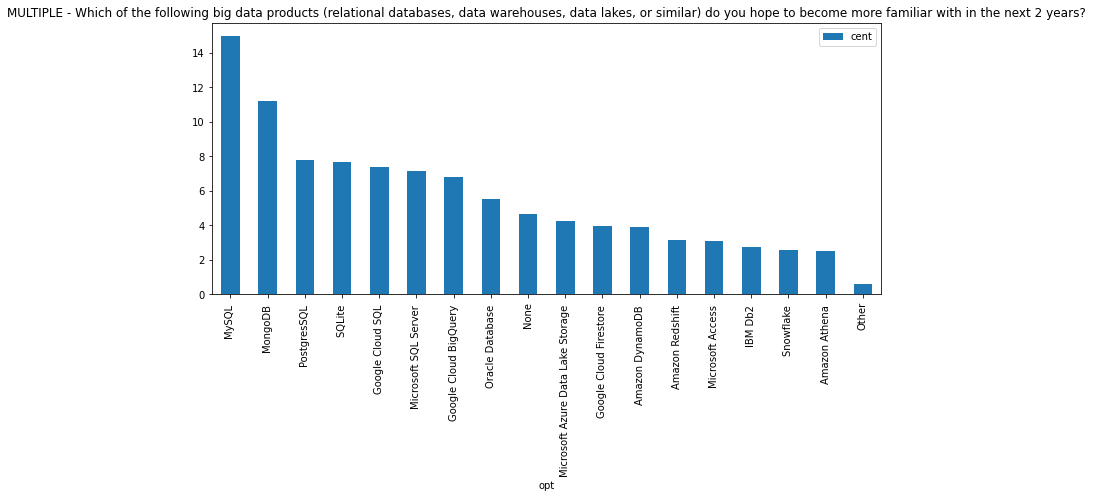

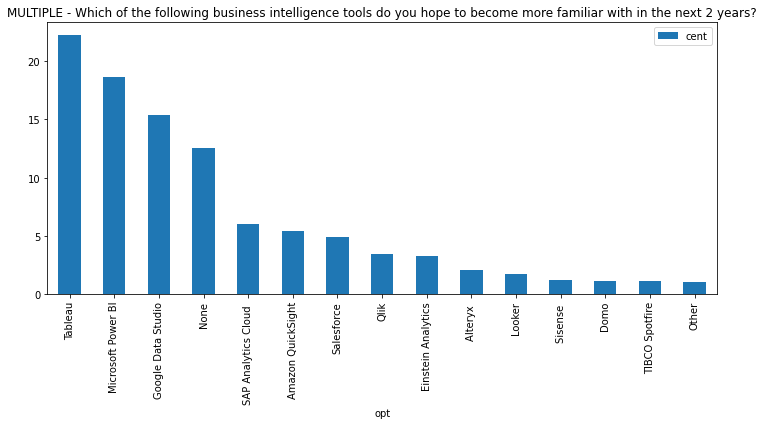

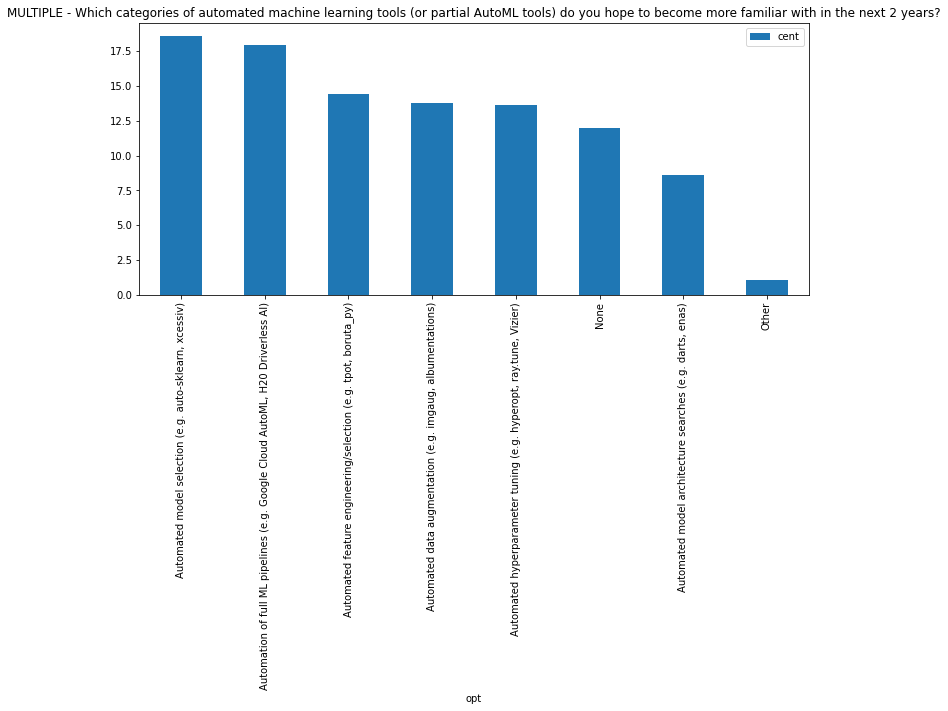

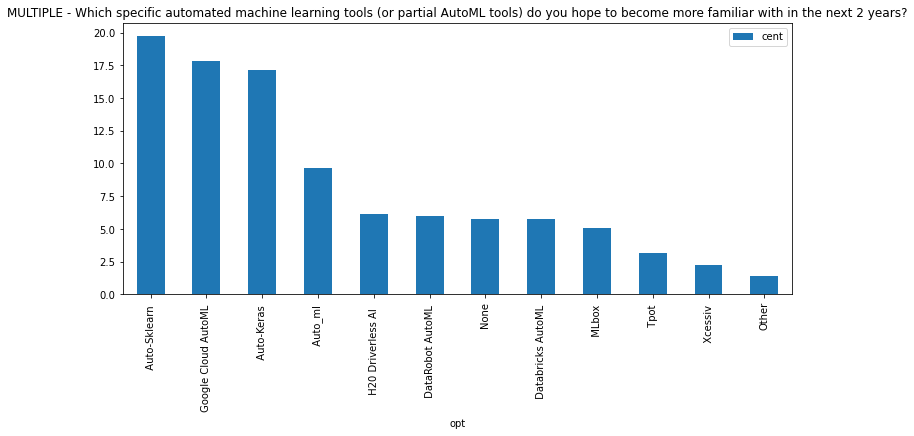

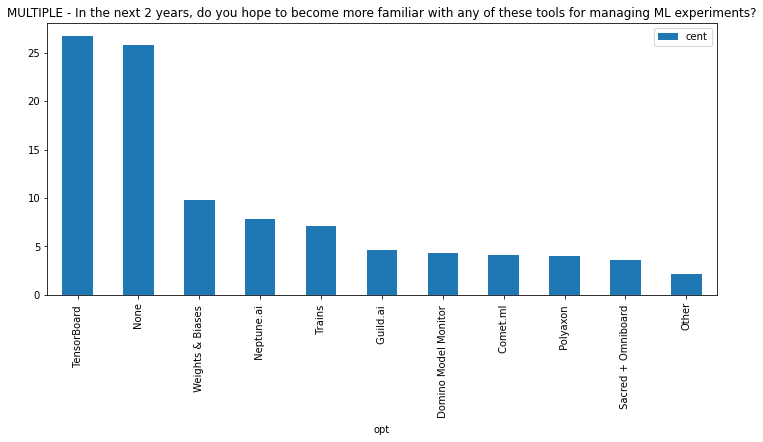

In [466]:
for i in question_list[20:]:
    get_chart(i)